<a href="https://colab.research.google.com/github/ian-mutai0/Hass-Consult-Project/blob/main/HassConsulting_Week_7_IP.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **HASS CONSULTING PROJECT**

# 1.0 Defining the Question

> ## i) Specifying the data analytic question

We want to study the factors that affect housing prices using information collected on real estate properties. 

> ## ii) Defining the Metric for Success

To be able to create a model that allows Hass Consulting to accurately predict the prices of houses using the specified predictor variables. 

> ## iii) Understanding the Context

Hass Consulting Company is a real estate leader in Kenya with over 25 years of experience that offers a variety of services such as ;
- Property sales and letting
- Property market research
- Asset valuation
- Property and Facilities management

Hass Consult has proven to be an important company providing investors, home owners, the financial industry and consumers with current and historical information about house price inflation - allowing them to make informed decisions in the housing market, in order to enjoy the best possible returns. 

> ## iv) Recording the experimental design

- Import the relevant libraries that we will use in our analysis
- Read and explore the dataset we will use for our project
- Define the appropriateness of the available data with regards to the project
- Find and deal with outliers, anomalies, and missing data within the dataset. 
- Perform univariate, bivariate and multivariate analysis recording your observations.
- Perform regression analysis and incorporate categorical independent variables into our models.
- Check for multicollinearity.
- Create residual plots for your models, and assess heteroskedasticity using Barlett's test.
- Provide a recommendation based on our analysis.
- Challenge our solution by performing modelling using the following regression techniques [Multiple Linear, Quantile regression, Ridge, Lasso, Elastic Net] then evaluate their performance.

# 2.0 Importing the relevant libraries

In [331]:
#Importing our required libraries

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
from matplotlib import pyplot as plt
%matplotlib inline
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler , PolynomialFeatures
from sklearn.model_selection import train_test_split 
import statsmodels.formula.api as smf
from sklearn import linear_model
from sklearn.linear_model import LinearRegression , Ridge , Lasso , ElasticNet
from sklearn.metrics import mean_squared_error , accuracy_score , confusion_matrix
from sklearn.model_selection import GridSearchCV , KFold , StratifiedKFold , cross_val_score
import warnings 
warnings.filterwarnings('ignore')

!pip install fsspec

# 3.0 Loading the dataset

In [332]:
# Reading the Hass Consult dataset 
hass = pd.read_csv('http://bit.ly/IndependentProjectWeek7Dataset')

In [ ]:
# Checking the number of rows and columns in our dataset
hass.shape

(21613, 20)

In [333]:
# Checking the information on our dataset
hass.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 20 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21613 non-null  int64  
 1   price          21613 non-null  float64
 2   bedrooms       21613 non-null  int64  
 3   bathrooms      21613 non-null  float64
 4   sqft_living    21613 non-null  int64  
 5   sqft_lot       21613 non-null  int64  
 6   floors         21613 non-null  float64
 7   waterfront     21613 non-null  int64  
 8   view           21613 non-null  int64  
 9   condition      21613 non-null  int64  
 10  grade          21613 non-null  int64  
 11  sqft_above     21613 non-null  int64  
 12  sqft_basement  21613 non-null  int64  
 13  yr_built       21613 non-null  int64  
 14  yr_renovated   21613 non-null  int64  
 15  zipcode        21613 non-null  int64  
 16  lat            21613 non-null  float64
 17  long           21613 non-null  float64
 18  sqft_l

# 4.0 Cleaning the dataset

> ## i) Validity

In [334]:
# Dropping the unnecessary columns from our Hass dataset
hass.drop(['id','zipcode','yr_built','yr_renovated'], axis = 1, inplace = True)

> ## ii) Accuracy

> ## iii) Completeness

In [335]:
# Checking for missing or null values
hass.isnull().any()

price            False
bedrooms         False
bathrooms        False
sqft_living      False
sqft_lot         False
floors           False
waterfront       False
view             False
condition        False
grade            False
sqft_above       False
sqft_basement    False
lat              False
long             False
sqft_living15    False
sqft_lot15       False
dtype: bool

> ## iv) Consistency

In [336]:
# Checking for duplicate values
hass.duplicated().any()

# Dropping the duplicated values
hass.drop_duplicates(inplace = True)

> ## v) Uniformity

In [337]:
# Hass Consulting Dataset
# Changing column names to lower case and placing underscore to make the column names uniform in the Hass dataset
hass.columns = hass.columns.str.strip().str.lower().str.replace(' ', '_').str.replace('(', '').str.replace(')', '')
hass.head()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,lat,long,sqft_living15,sqft_lot15
0,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,47.5112,-122.257,1340,5650
1,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,47.7210,-122.319,1690,7639
2,180000.0,2,1.00,770,10000,1.0,0,0,3,6,770,0,47.7379,-122.233,2720,8062
3,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,47.5208,-122.393,1360,5000
4,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,47.6168,-122.045,1800,7503


# 5.0 Exploratory Data Analysis

 ## 5.1 Univariate Analysis

### 5.1.1 Categorical Variables

**There are no categorical variables in our dataset thus we will not do any univariate or bivariate analysis using the frequency tables, pie charts or histograms.**

### 5.1.2 Numerical Variables

> #### i) Measures of Central Tendency

In [338]:
# Mean 
hass.mean()

price            540188.019994
bedrooms              3.370945
bathrooms             2.114697
sqft_living        2079.952006
sqft_lot          15110.250474
floors                1.494099
waterfront            0.007544
view                  0.234230
condition             3.409497
grade                 7.656639
sqft_above         1788.411996
sqft_basement       291.540010
lat                  47.560050
long               -122.213904
sqft_living15      1986.569121
sqft_lot15        12770.634239
dtype: float64

In [339]:
# Median 
hass.median()

price            450000.0000
bedrooms              3.0000
bathrooms             2.2500
sqft_living        1910.0000
sqft_lot           7620.0000
floors                1.5000
waterfront            0.0000
view                  0.0000
condition             3.0000
grade                 7.0000
sqft_above         1560.0000
sqft_basement         0.0000
lat                  47.5718
long               -122.2310
sqft_living15      1840.0000
sqft_lot15         7620.0000
dtype: float64

In [340]:
# Mode
hass.mode()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,lat,long,sqft_living15,sqft_lot15
0,350000.0,3.0,2.5,1300.0,5000.0,1.0,0.0,0.0,3.0,7.0,1300.0,0.0,47.5322,-122.29,1540.0,5000.0
1,450000.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,47.5491,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,47.6624,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,47.6846,NaN,NaN,NaN


> ####  ii) Measures of dispersion

In [341]:
# Standard Deviation
hass.std()

price            367407.570322
bedrooms              0.930121
bathrooms             0.770233
sqft_living         918.526493
sqft_lot          41425.768049
floors                0.539879
waterfront            0.086529
view                  0.766185
condition             0.650791
grade                 1.175508
sqft_above          828.160213
sqft_basement       442.622393
lat                   0.138581
long                  0.140827
sqft_living15       685.434228
sqft_lot15        27307.529388
dtype: float64

In [342]:
# Variance
hass.var()

price            1.349883e+11
bedrooms         8.651245e-01
bathrooms        5.932584e-01
sqft_living      8.436909e+05
sqft_lot         1.716094e+09
floors           2.914699e-01
waterfront       7.487288e-03
view             5.870390e-01
condition        4.235292e-01
grade            1.381820e+00
sqft_above       6.858493e+05
sqft_basement    1.959146e+05
lat              1.920475e-02
long             1.983226e-02
sqft_living15    4.698201e+05
sqft_lot15       7.457012e+08
dtype: float64

In [343]:
# Quantiles
hass.quantile([0.25,0.50,0.75])

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,lat,long,sqft_living15,sqft_lot15
0.25,321725.0,3.0,1.75,1428.5,5040.0,1.0,0.0,0.0,3.0,7.0,1190.0,0.0,47.47085,-122.328,1490.0,5100.0
0.50,450000.0,3.0,2.25,1910.0,7620.0,1.5,0.0,0.0,3.0,7.0,1560.0,0.0,47.57180,-122.231,1840.0,7620.0
0.75,645000.0,4.0,2.50,2550.0,10692.0,2.0,0.0,0.0,4.0,8.0,2210.0,560.0,47.67800,-122.125,2360.0,10083.5


In [344]:
# Range
max = hass.max()
min = hass.min()
range = max - min
print("The range within the real estate data is: \n", range)

The range within the real estate data is: 
 price            7.625000e+06
bedrooms         3.300000e+01
bathrooms        8.000000e+00
sqft_living      1.325000e+04
sqft_lot         1.650839e+06
floors           2.500000e+00
waterfront       1.000000e+00
view             4.000000e+00
condition        4.000000e+00
grade            1.200000e+01
sqft_above       9.120000e+03
sqft_basement    4.820000e+03
lat              6.217000e-01
long             1.204000e+00
sqft_living15    5.811000e+03
sqft_lot15       8.705490e+05
dtype: float64


In [345]:
# Kurtosis
price = hass['price'].kurt()
print("The kurtosis of the price is: \n", price)

if price > 0:
  print("The price data is leptokurtic")
elif price < 0:
  print("The price data is platykurtic")
else:
  print("The price data is mesokurtic")
print('\n') 

The kurtosis of the price is: 
 34.51407156316063
The price data is leptokurtic




In [346]:
# Skewness
price1 = hass['price'].skew()
print("The skewness of the price data is: \n", price1)
if price1 == 0:
  print("The price distribution is symmetrical")
elif price1 > 0:
  print("The price distribution is positively skewed")
else:
  print("The price distribution is negatively skewed")
print('\n')

The skewness of the price data is: 
 4.021315217265932
The price distribution is positively skewed




> #### iii) Visualization Techniques

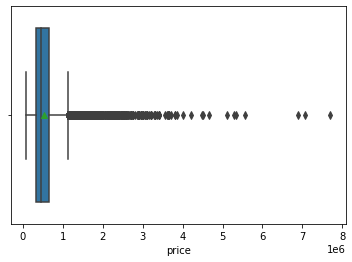

In [347]:
# Checking for outliers in the prices
sns.boxplot(hass['price'], showmeans=True)

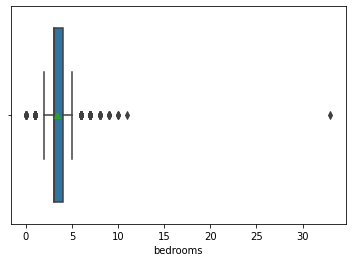

In [348]:
# Checking for outliers in the number of bedrooms
sns.boxplot(hass['bedrooms'], showmeans=True)

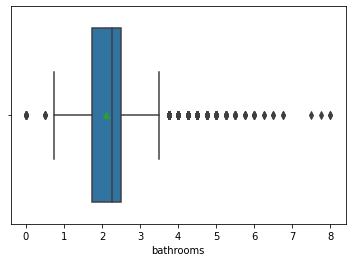

In [349]:
# Checking for ouliers in the number of bathrooms
sns.boxplot(hass['bathrooms'], showmeans=True)

**We will not drop any outliers especially on price because the prices are actual representations of the value of the different houses therefore they are necessary in our analysis.**

## 5.2 Bivariate Analysis

### 5.2.1 Numerical and Numerical Variables

> #### i) Scatter Plots

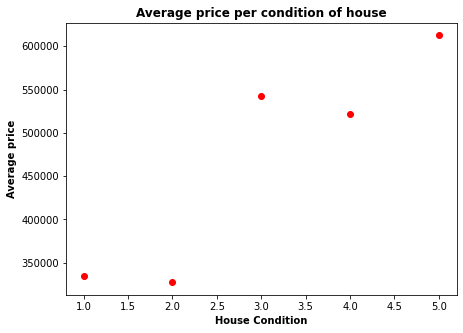

In [350]:
# Scatter plot between the price and the condition of the house
condition =hass.groupby('condition')['price'].mean().reset_index(name='average price per condition')
plt.figure(figsize=(7,5))
plt.scatter(condition['condition'] , condition['average price per condition'], color='red')
plt.xlabel("House Condition", fontweight='bold')
plt.ylabel("Average price", fontweight='bold')
plt.title("Average price per condition of house", y=1.0, fontweight='bold')
plt.show()

**We can clearly see from the scatter plot that the better the condition of the house, the higher the price and the lower the house condition, the lower the price.**

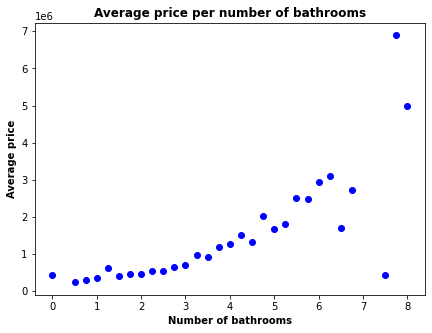

In [351]:
# Scatter plot between price and the number of bathrooms
price =hass.groupby('bathrooms')['price'].mean().reset_index(name='average price per number of bathrooms')
plt.figure(figsize=(7,5))
plt.scatter(price['bathrooms'] , price['average price per number of bathrooms'], color='blue')
plt.xlabel("Number of bathrooms", fontweight='bold')
plt.ylabel("Average price", fontweight='bold')
plt.title("Average price per number of bathrooms", y=1.0, fontweight='bold')
plt.show()

**We can conclude using the scatter plot that as the number of bathrooms in a house increases, the higher the price of the house becomes.**

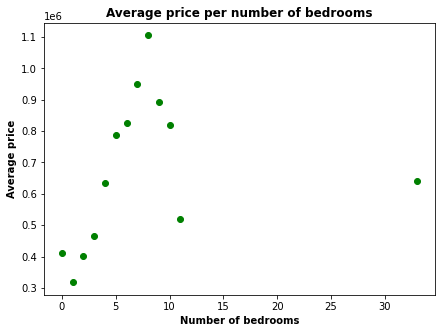

In [352]:
# Scatter plot between price and the number of bedrooms
bed =hass.groupby('bedrooms')['price'].mean().reset_index(name='average price per number of bedrooms')
plt.figure(figsize=(7,5))
plt.scatter(bed['bedrooms'] , bed['average price per number of bedrooms'], color='green')
plt.xlabel("Number of bedrooms", fontweight='bold')
plt.ylabel("Average price", fontweight='bold')
plt.title("Average price per number of bedrooms", y=1.0, fontweight='bold')
plt.show()

**What we can conclude from this plot is that there is an increase in price when dealing with increase in the number of bedrooms in a house. The price range is quite high thus the plot uses len on the y-axis as its range of the price values.**

>#### ii) Correlation

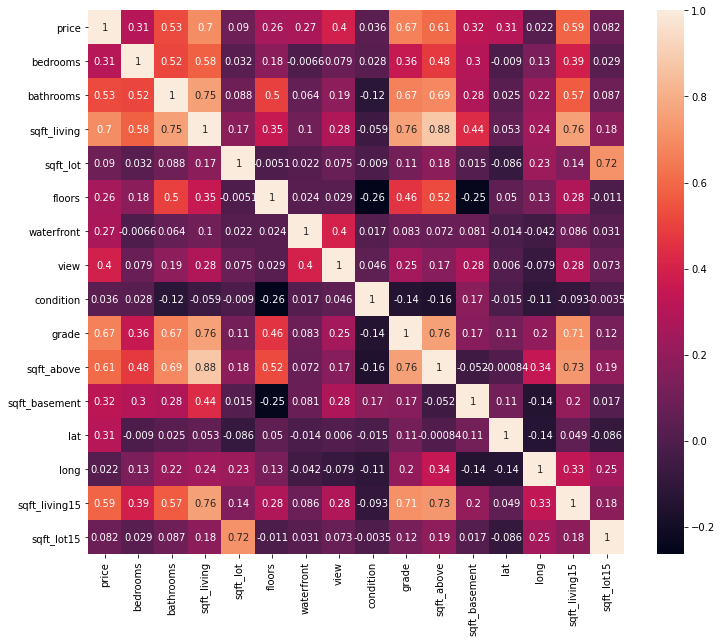

In [354]:
# Visualizing the correlation using a heatmap
plt.figure(figsize=(12,10))
sns.heatmap(hass.corr(), annot=True)
plt.show()

> ## 5.3 Multivariate Analysis

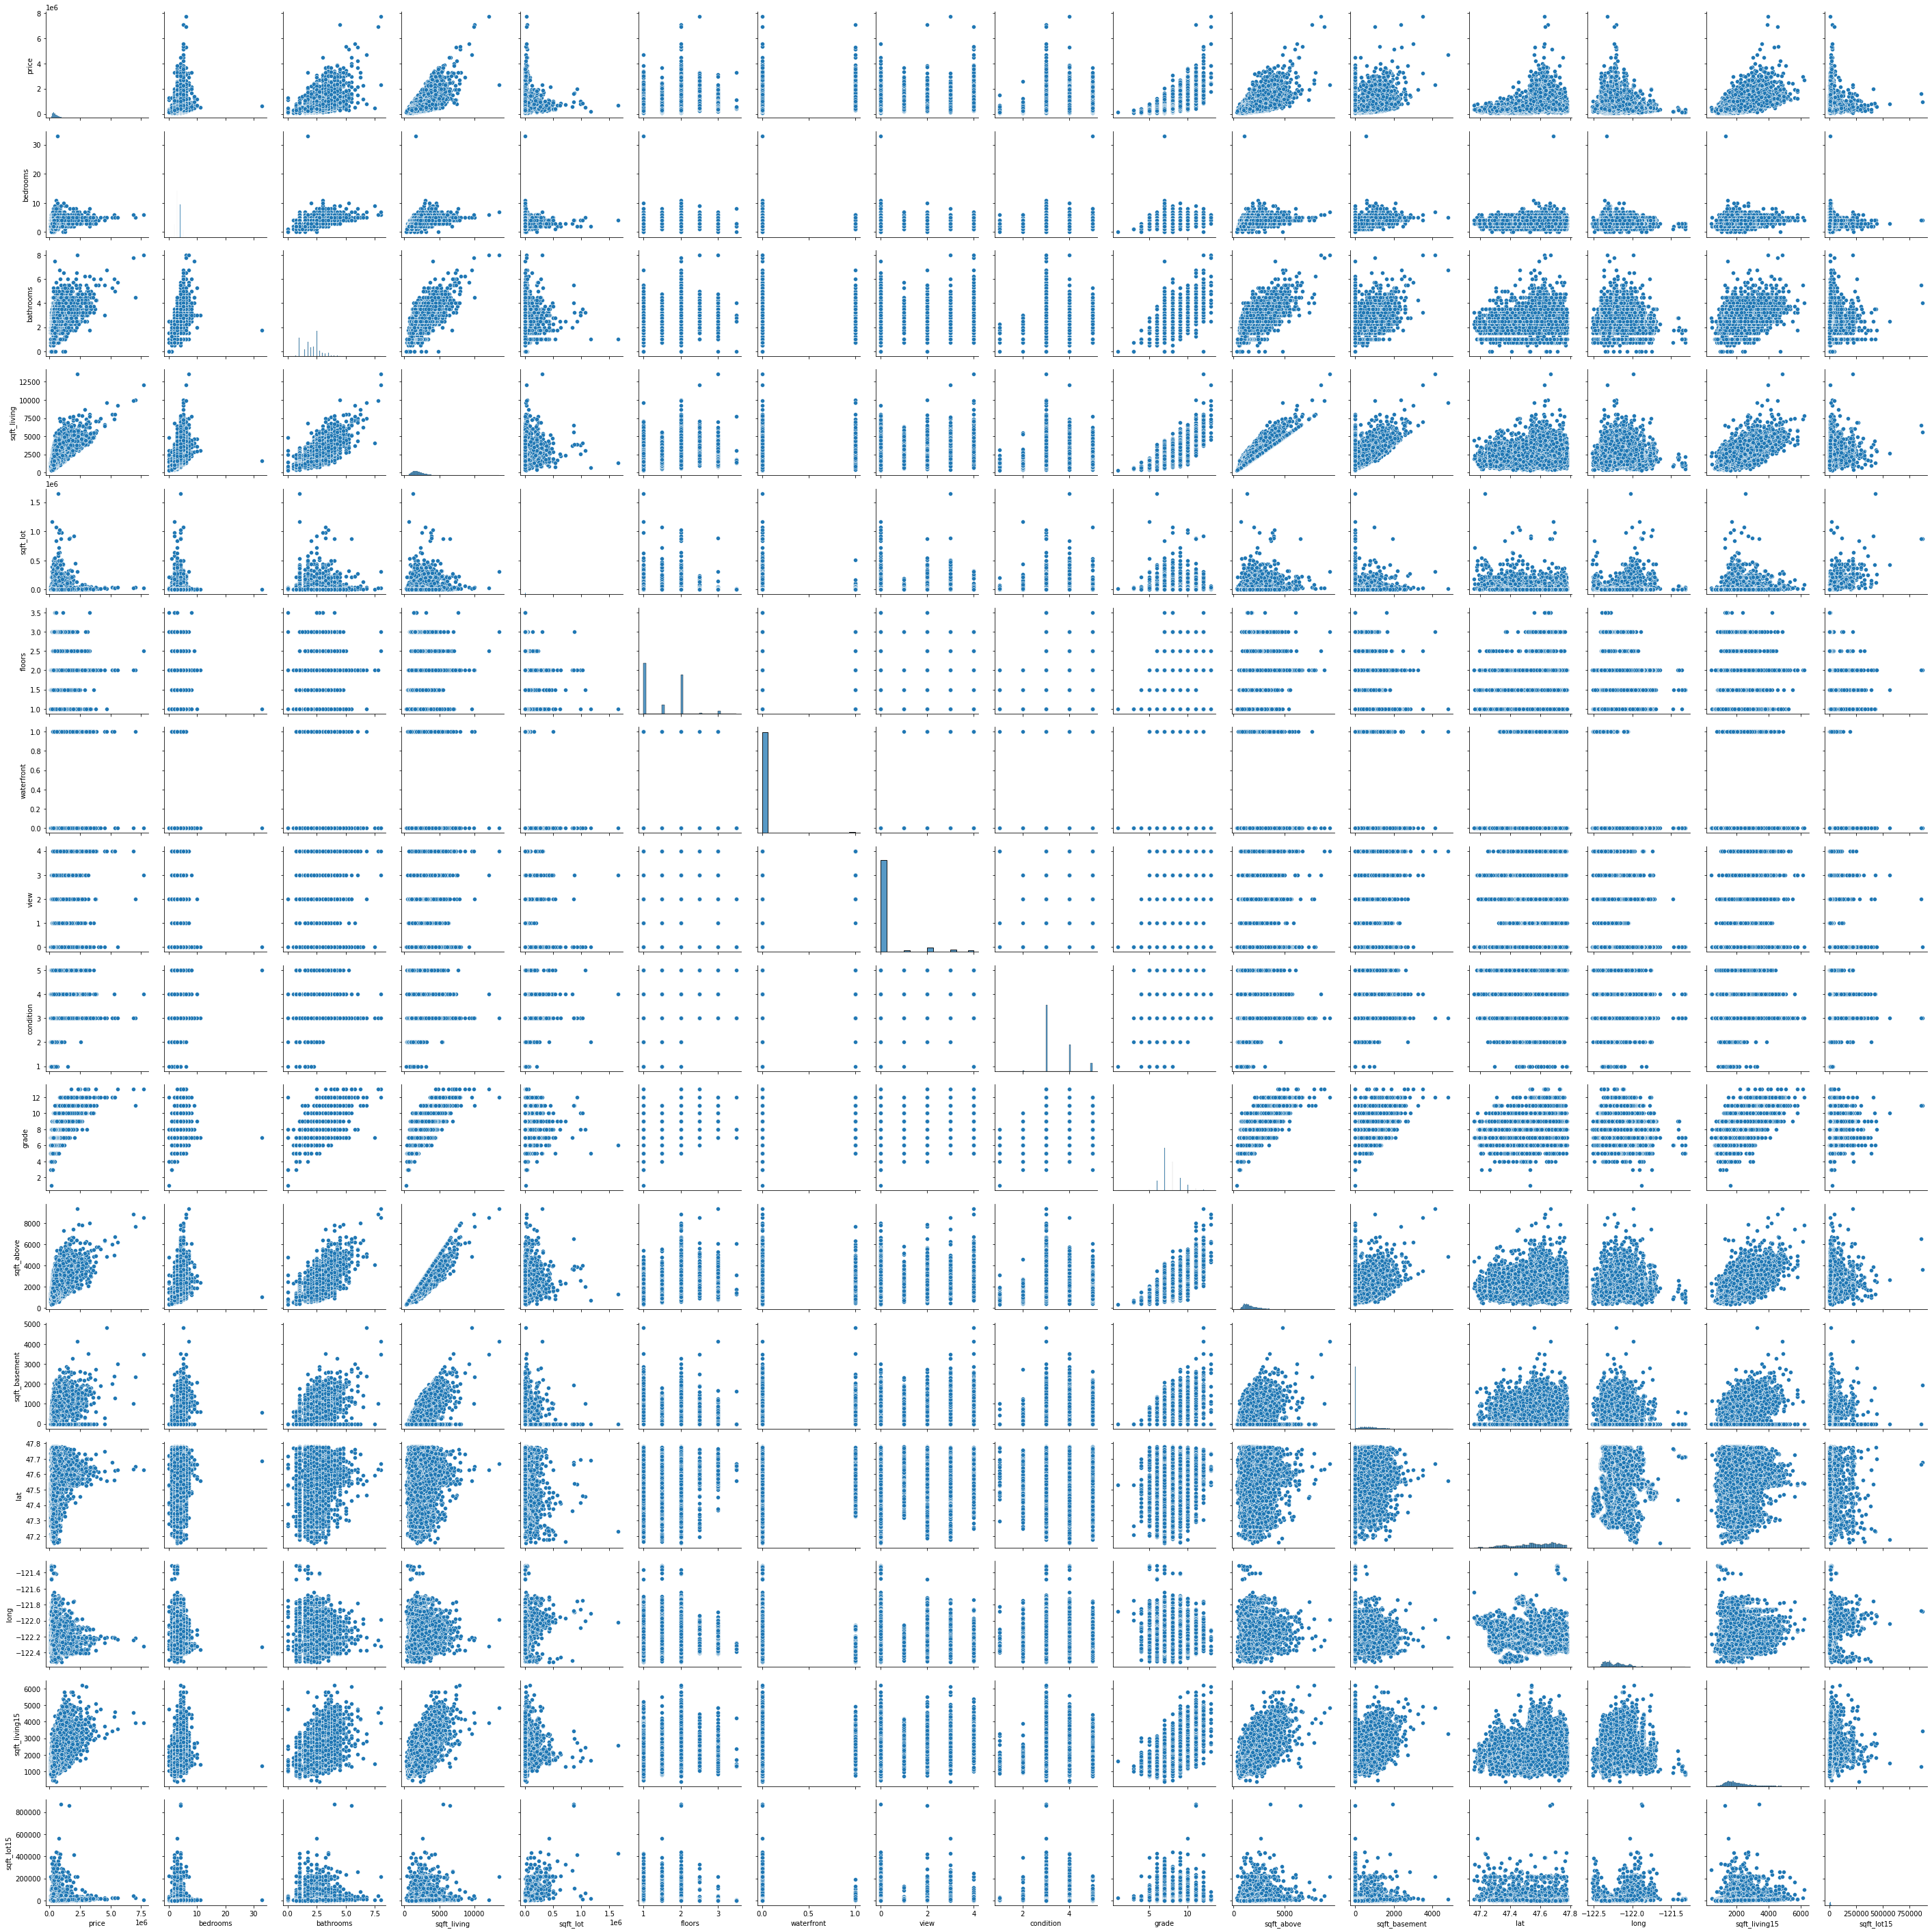

In [353]:
sns.pairplot(hass)
plt.show()

# 6.0 Implementing the Solution

## 6.1 Check for multicollinearity

In [355]:
# First we check how our independent variables are correlated
# Remove the price column, we want to focus on our independent variables only.
independent_variables = hass.drop(columns=['price'])

# Let's display the correlations between the variables
correlation = independent_variables.corr()
correlation

,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,lat,long,sqft_living15,sqft_lot15
bedrooms,1.000000,0.515995,0.576645,0.031665,0.175657,-0.006593,0.079406,0.028358,0.357150,0.477572,0.303098,-0.008972,0.129427,0.391582,0.029190
bathrooms,0.515995,1.000000,0.754732,0.087772,0.500710,0.063754,0.187915,-0.124913,0.665035,0.685393,0.283822,0.024593,0.223008,0.568689,0.087217
sqft_living,0.576645,0.754732,1.000000,0.172812,0.354195,0.103818,0.284631,-0.058820,0.762893,0.876593,0.435060,0.052515,0.240150,0.756399,0.183262
sqft_lot,0.031665,0.087772,0.172812,1.000000,-0.005085,0.021597,0.074739,-0.008997,0.113693,0.183509,0.015266,-0.085685,0.229563,0.144604,0.718551
floors,0.175657,0.500710,0.354195,-0.005085,1.000000,0.023740,0.029412,-0.263697,0.458086,0.524153,-0.245683,0.049609,0.125487,0.280066,-0.011145
waterfront,-0.006593,0.063754,0.103818,0.021597,0.023740,1.000000,0.401992,0.016645,0.082800,0.072076,0.080584,-0.014273,-0.041912,0.086468,0.030697
view,0.079406,0.187915,0.284631,0.074739,0.029412,0.401992,1.000000,0.045811,0.251431,0.167644,0.276997,0.006046,-0.078582,0.280400,0.072561
condition,0.028358,-0.124913,-0.058820,-0.008997,-0.263697,0.016645,0.045811,1.000000,-0.144592,-0.158272,0.174068,-0.014979,-0.106555,-0.092908,-0.003461
grade,0.357150,0.665035,0.762893,0.113693,0.458086,0.082800,0.251431,-0.144592,1.000000,0.756090,0.168481,0.114101,0.198487,0.713395,0.119325
sqft_above,0.477572,0.685393,0.876593,0.183509,0.524153,0.072076,0.167644,-0.158272,0.756090,1.000000,-0.051933,-0.000836,0.343750,0.731848,0.194037


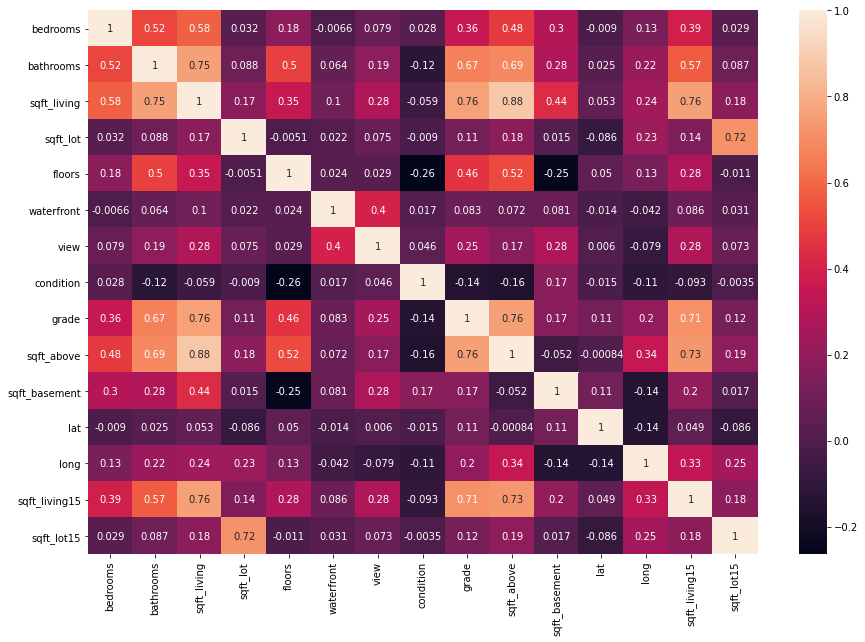

In [356]:
# Visualizing the correlation using a heatmap
plt.subplots(figsize =  (15,10))
sns.heatmap(independent_variables.corr(), annot=True)
plt.show()

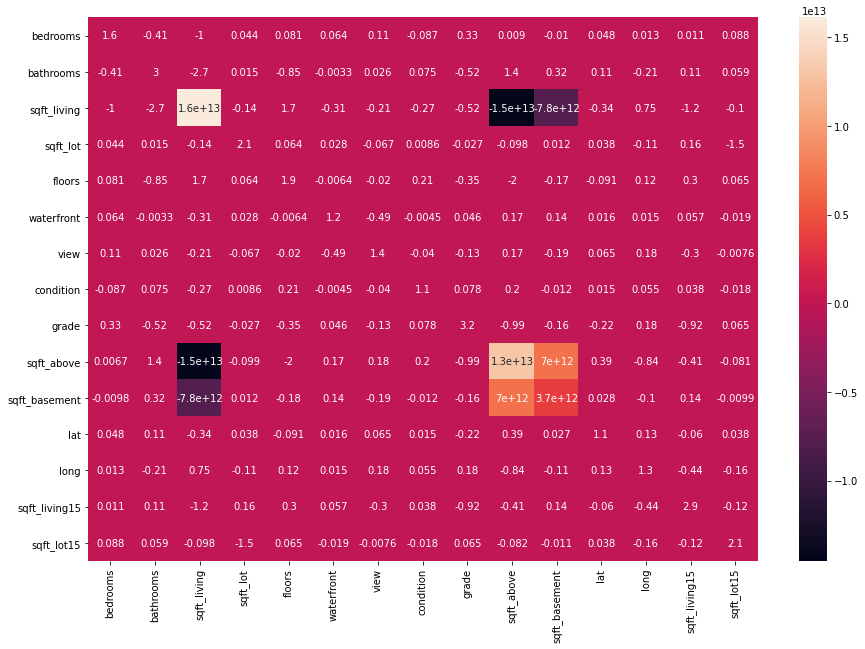

In [357]:
# Checking for multicollinearity using the VIF (Variation Inflation Factor)
vif = pd.DataFrame(np.linalg.inv(correlation.values), index = correlation.index, columns = correlation.columns)

# Visualize the VIF using a heatmap
plt.subplots(figsize =  (15,10))
sns.heatmap(vif, annot = True)
plt.show()

In [358]:
# After reviewing the VIF heatmap, we can see the VIF scores for 
# the sqft_living, sqft_above and sqft_basement are more than 10
# which suggests that they are highly correlated thus should be dropped
revised = independent_variables.drop(columns=['sqft_living','sqft_above','sqft_basement'])

correlations = revised.corr()
pd.DataFrame(np.linalg.inv(correlations.values), index = correlations.index, columns=correlations.columns)

,bedrooms,bathrooms,sqft_lot,floors,waterfront,view,condition,grade,lat,long,sqft_living15,sqft_lot15
bedrooms,1.434144,-0.722803,0.003743,0.123496,0.047218,0.066877,-0.116120,0.059219,0.038952,0.028475,-0.282857,0.054028
bathrooms,-0.722803,2.441861,-0.032103,-0.614496,-0.017395,-0.097904,0.009058,-0.857048,0.057682,-0.114628,-0.254912,0.015132
sqft_lot,0.003743,-0.032103,2.088113,0.042428,0.023109,-0.066297,0.006812,-0.093839,0.042420,-0.114867,0.091995,-1.465882
floors,0.123496,-0.614496,0.042428,1.514280,-0.028091,0.111371,0.262951,-0.460880,-0.008971,-0.032973,0.196365,0.056712
waterfront,0.047218,-0.017395,0.023109,-0.028091,1.196773,-0.489410,-0.003552,0.011831,0.020627,0.006307,0.022056,-0.023291
view,0.066877,-0.097904,-0.066297,0.111371,-0.489410,1.356455,-0.062815,-0.134080,0.037478,0.234761,-0.318812,-0.010260
condition,-0.116120,0.009058,0.006812,0.262951,-0.003552,-0.062815,1.095703,0.061864,0.003678,0.077326,0.019105,-0.021148
grade,0.059219,-0.857048,-0.093839,-0.460880,0.011831,-0.134080,0.061864,2.790120,-0.192791,0.137892,-1.380391,0.013061
lat,0.038952,0.057682,0.042420,-0.008971,0.020627,0.037478,0.003678,-0.192791,1.052356,0.161427,-0.038788,0.039894
long,0.028475,-0.114628,-0.114867,-0.032973,0.006307,0.234761,0.077326,0.137892,0.161427,1.277223,-0.482629,-0.164757


## 6.2 Residual Plots

In [359]:
# Let's start by creating a model based on our revised set of independent variables above
# then displaying the residual plot for it.

X = revised.values
y = hass['price'].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

regressor = LinearRegression()
regressor.fit(X_train, y_train)

# This is our prediction for admission based on our model
y_predict = regressor.predict(X_test)

# We now create the residual by substracting the test value from the predicted 
# value for each row in our dataset

residuals = np.subtract(y_predict, y_test)

# Let's describe our residual:
print(pd.DataFrame(residuals).describe())
print('*'*60)
residuals.mean()

                  0
count  4.322000e+03
mean  -6.380014e+03
std    2.287101e+05
min   -4.766220e+06
25%   -8.513059e+04
50%    1.356037e+04
75%    1.125022e+05
max    9.498961e+05
************************************************************


-6380.0142745892035

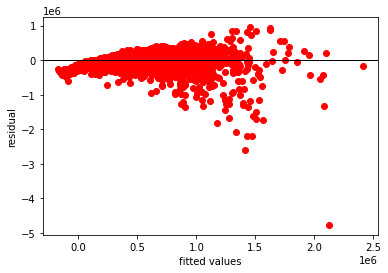

In [360]:
# Residuals Plot
import matplotlib.pyplot as plt

plt.scatter(y_predict, residuals, color='red')
plt.ylabel('residual')
plt.xlabel('fitted values')
plt.axhline(y= residuals.mean(), color='black', linewidth=1)
plt.show()

## 6.3 Check for Heteroskedasticity

**We are going to use the Barlett's test to check for heteroskedasticity. The test establishes as a null hypothesis that the variance is equal for all our datapoints,and the new hypothesis that the variance is different for at least one pair of datapoints.**

In [361]:
# Barlett's test for heteroskedasticity
# Import the scipy library
import scipy as sp

test_result, p_value = sp.stats.bartlett(y_predict, residuals)

# To interpret the results we must also compute a critical value of the chi squared distribution
degree_of_freedom = len(y_predict)-1
probability = 1 - p_value

critical_value = sp.stats.chi2.ppf(probability, degree_of_freedom)
print(critical_value)

# If the test_result is greater than the critical value, then we reject our null
# hypothesis. This would mean that there are patterns to the variance of the data

# Otherwise, we can identify no patterns, and we accept the null hypothesis that 
# the variance is homogeneous across our data

if (test_result > critical_value):
  print('the variances are unequal, and the model should be reassessed')
else:
  print('the variances are homogeneous!')

inf
the variances are homogeneous!


## 6.4 Multivariate Linear Regression

In [362]:
# First we define the predictor(y) variables and the target(x) variables
# The target variable is price
X = revised.values
y = hass['price'].values

In [363]:
# Splitting the dataset into train and test sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 10)

In [364]:
# Scaling data using the StandardScaler() object
scaler = StandardScaler()
scaler.fit(X)
X = scaler.transform(X)

In [365]:
# Creating our baseline multivariate linear regression model
regressor = LinearRegression()

# We then fit our train set into the model
regressor.fit(X_train,y_train)
y_pred = regressor.predict(X_test)

# We then get the mean squared error of our multivariate linear regression model for comparison purposes
first_model = (mean_squared_error(y_test,y_pred))
print(first_model)

# The mean square error for our OLS model is 55999376029.73

55999376029.73567


In [366]:
# Checking for accuracy using the r2 score
# First we import 
from sklearn import metrics
from sklearn.metrics import r2_score

r = r2_score(y_test,y_pred)
print(r)

# The OLS model has an accuracy of 61.09% 

0.6109782581567869


### Findings

**The accuracy of our multiple linear regression model is 61.09%. We will challenge the solution by trying out the other regression techniques with the aim of improving our prediction accuracy.**

# 7.0 Challenging the solution

> ## 7.1 Ridge Regression

In [305]:
# Having already defined our x and y variables, we can go ahead to introduce the ridge object
X = revised.values
y = hass['price'].values

In [306]:
# We first create our ridge model and indicate normalization in order to get better estimates. 
# Next we setup the grid that we will use. 
ridge = Ridge(normalize=True)
search = GridSearchCV(estimator=ridge,param_grid={'alpha':np.logspace(-5,2,8)},scoring='neg_mean_squared_error', n_jobs=1,refit=True,cv=10)

In [307]:
# We now use the .fit function to run the model and then use the .best_params_ and
# .best_scores_ function to determine the models strength.
search.fit(X_train,y_train)
search.best_params_
{'alpha':0.001}
abs(search.best_score_)
# The best_params_ tells us what to set alpha  which in this case is 0.001 
# The best_score_ tells us what the best possible mean squared error is. 
# We find the best possible MSE using ridge regression is 48131653644.56
# The mean square error for our OLS model is 55999376029.73
# Already our ridge model is providing a better MSE as compared to the OLS mean square error

48131653644.56344

In [308]:
# The ridge value is not cross validated
ridge = Ridge(normalize=True,alpha=0.001)
ridge.fit(X_train,y_train)
y_pred1 = ridge.predict(X_test)
second_model =(mean_squared_error(y_test,y_pred1))
print(second_model)

# Evidently our ridge model has a worse mean standard error than the ordinary least square model

56001026639.771225


In [309]:
# Checking for accuracy using the r2 score
# First we import 
from sklearn import metrics
from sklearn.metrics import r2_score

r = r2_score(y_test,y_pred1)
print(r)

# The accuracy score while using ridge regression is similar to the one determined by our OLS model

0.6109667915434662


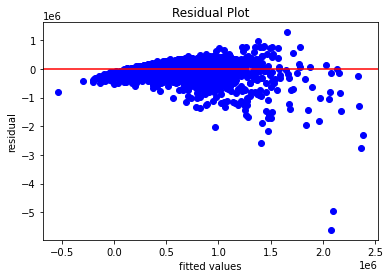

In [310]:
# Residuals
residuals = y_pred1 - y_test

# Plotting the prediction errors using a residuals plot

plt.scatter(y_pred1, residuals, color='blue')
plt.title('Residual Plot')
plt.ylabel('residual')
plt.xlabel('fitted values')
plt.axhline(y= residuals.mean(), color='red')
plt.show()

### Findings

**After evaluating the performance of our ridge model, 
 we can go ahead and conclude that there is no difference between the accuracies of the two models (61.09%) therefore the use of ridge regression is not justifiable.**

## 7.2 Lasso Regression

In [311]:
# Define the predictor and target variables
X = revised.values
y = hass['price'].values

In [312]:
# Split the dataset into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=101)

In [313]:
# Importing StandardScaler
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X_train)
X = scaler.transform(X_train)

In [316]:
# Choosing the set of parameters and creating our linear and lasso regression models for comparison
parameters = {'alpha': np.concatenate((np.arange(0.1,2,0.1), np.arange(2, 5, 0.5), np.arange(5, 25, 1)))}
linear = linear_model.LinearRegression()
lasso = linear_model.Lasso() 
gridlasso = GridSearchCV(lasso, parameters, scoring ='r2')

In [317]:
# Fitting models and print the best parameters, R-squared scores, MSE, and coefficients
gridlasso.fit(X_train, y_train) 
linear.fit(X_train, y_train) 
print("lasso best parameters:", gridlasso.best_params_) 
print("lasso score:", gridlasso.score(X_test, y_test))
print("linear score:", linear.score(X_test, y_test)) 
print("lasso MSE:", mean_squared_error(y_test, gridlasso.predict(X_test)))
print("linear MSE:", mean_squared_error(y_test, linear.predict(X_test))) 
print("lasso best estimator coef:", gridlasso.best_estimator_.coef_)
print("linear coef:", linear.coef_)

# Keeping in mind that the higher the alpha, the simpler/less complex the model is. 
# The lasso score is 64% accurate which is quite good as compared to the other regression models

lasso best parameters: {'alpha': 16.0}
lasso score: 0.6438577508997534
linear score: 0.6438599756476566
lasso MSE: 46341997622.12656
linear MSE: 46341708133.1308
lasso best estimator coef: [ 6.51079389e+03  7.43024263e+04  3.90090323e-01 -2.28712152e+04
  6.26007111e+05  6.54544282e+04  6.02249352e+04  1.22545911e+05
  6.42181121e+05 -2.65503766e+05  1.05987371e+02 -1.60236466e-01]
linear coef: [ 6.52730270e+03  7.43823720e+04  3.90444873e-01 -2.29734952e+04
  6.28481693e+05  6.53364414e+04  6.02365535e+04  1.22543060e+05
  6.42957372e+05 -2.66338728e+05  1.06006822e+02 -1.59494547e-01]


#### Findings

**Using Lasso regression technique, we can see that there is a slight improvement in accuracy (64.38%) as compared to the accuracy of our multivariate linear regression.**

## 7.3 Elastic Net Regression

In [320]:
# Defining the x and y variables
X = revised.values
y = hass['price'].values

In [321]:
# Splitting the dataset into train and test sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 10)

In [319]:
# Elastic Net Model
# Elastic net, just like ridge and lasso regression, requires normalize data. 
# This argument  is set inside the ElasticNet function. 
# The second thing we need to do is create our grid.
# 
elastic=ElasticNet(normalize=True)
search=GridSearchCV(estimator=elastic,param_grid={'alpha':np.logspace(-5,2,8),'l1_ratio':[.2,.4,.6,.8]},scoring='neg_mean_squared_error',n_jobs=1,refit=True,cv=10)

In [323]:
# We will now fit our model and display the best parameters and the best results we can get with that setup.
search.fit(X,y)
print(search.best_params_)
abs(search.best_score_)

# Alpha = 1e-05 while the l1_ratio = 0.8
# The mean square error for our OLS model is 55999376029.73
# # The MSE of our elastic model is better as it is less than the one for our linear model

{'alpha': 1e-05, 'l1_ratio': 0.8}


50646228660.690186

In [324]:
# The best hyperparameters was an alpha set to 1e-05 and a l1_ratio of 0.8.  
# For clarity, we will set our hyperparameters to the recommended values and run on the data.

elastic=ElasticNet(normalize=True,alpha=0.1,l1_ratio=0.8)
elastic.fit(X,y)
y_pred2 = elastic.predict(X_test)
second_model=(mean_squared_error(y_test,y_pred2))
print(second_model)
elastic=ElasticNet(normalize=True,alpha=1e-05,l1_ratio=0.8)
elastic.fit(X,y)
y_pred2 = elastic.predict(X_test)
second_model=(mean_squared_error(y_test,y_pred2))
print(second_model)

# The mean square error for our OLS model is 55999376029.73 
# We are able to determine that the MSE for elastic regression is bigger than the OLS MSE
# thus elastic is performing worse than the OLS model


56001324371.23775


In [325]:
# Checking for accuracy using the r2 score
# First we import r2 score under the metrics library
from sklearn import metrics
from sklearn.metrics import r2_score

r = r2_score(y_test,y_pred2)
print(r)

# The accuracy score for the ElasticNet regression is actually similar to the accuracy score of the OLS

0.6109647232344613


### Findings

**From the ElasticNet regression we can acknowledge that using the model is not justified because its accuracy of 61.09% is not any better as compared to the accuracy score of the multivariate linear regression.**

## 7.4 Quantile Regression

In [329]:
# We will use the python package statsmodels for Quantile Regression
#
import statsmodels.formula.api as smf

# Finding the regression coefficients for the conditioned median, 0.5 quantile
mod = smf.quantreg('price ~ bedrooms + bathrooms + sqft_lot + floors + waterfront + view + condition+ grade + lat + long + sqft_living15 + sqft_lot15', hass)
res = mod.fit(q=.5)

# Then print out the summary of model
print(res.summary())

# The accuracy of our quantile regression is given by the pseudo R-squared which is 39.44% 

                         QuantReg Regression Results                          
Dep. Variable:                  price   Pseudo R-squared:               0.3944
Model:                       QuantReg   Bandwidth:                   2.276e+04
Method:                 Least Squares   Sparsity:                    2.998e+05
Date:                Wed, 26 May 2021   No. Observations:                21607
Time:                        19:22:45   Df Residuals:                    21594
                                        Df Model:                           12
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept     -1890.7222      9.849   -191.964      0.000   -1910.028   -1871.417
bedrooms       7700.0899   1313.094      5.864      0.000    5126.330    1.03e+04
bathrooms      2.102e+04   2063.432     10.187      0.000     1.7e+04    2.51e+04
sqft_lot          0.2789      0.035  

### Findings

**We can acknowledge that the quantile regression has given us the least accuracy (39.44%) as compared to the other regression techniques which simply means that this model is not suited for this dataset.**

# 8.0 Recommendations 

- After testing and evaluating the performance of the different regression models, we were able to determine that the Lasso (Least Absolute Shrinkage and Selection Operator) model gave us the best accuracy score of 64.39% and thus would be the most appropriate regression model to use in predicting the prices of houses in the given Hass Consulting dataset. 
- The Lasso model performs both feature/independent variable selection and regularization using the l1 penalty in order to enhance the accuracy of predicting the housing prices and interpretability of the resulting coefficients.